In [1]:
import re
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16, 12)})
sns.set(font_scale=1.5)  # crazy big

In [2]:
csv_url = r'https://d3c33hcgiwev3.cloudfront.net/em-9EhjTEemU7w7-EFnPcg_7aa34fc018d311e980c2cb6467517117_happyscore_income.csv?Expires=1587427200&Signature=ZNd7ADwo144zTY3jASrkgGTmBrnh~HXPUOSHS0KRl~I2cKGUBbiU~65olLDZq8coV5pAG169cAJiTEyRna4Tch1V-AEyls04mDL4VFULWzSCEvN-EowesRHMAGT9jmipugsYPglBtVeOCmZ-xfHLpdU9pscJiEqt0z7Nlq9ovc0_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'
df = pd.read_csv(csv_url)
df.shape

(111, 11)

In [3]:
happy_data = df[df.avg_income < 5000].sort_values(by=['happyScore'], ascending=False).reset_index(drop=True)
happy_data.head(10)

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Mexico,69.0,8.3,2.02,4148.000000,2646.973333,48.974444,'Latin America and Caribbean',7.187,1.02054,Mexico
1,Colombia,65.0,7.9,2.09,4618.062857,2618.674286,54.815714,'Latin America and Caribbean',6.477,0.91861,Colombia
2,Thailand,58.0,6.8,1.93,4792.500000,3523.545000,39.448750,'Southeastern Asia',6.455,0.96690,Thailand
3,El Salvador,56.0,6.7,2.03,3410.893333,2366.280000,44.823333,'Latin America and Caribbean',6.130,0.76454,El Salvador
4,Ecuador,57.0,6.8,1.99,3835.653333,2435.266667,50.095556,'Latin America and Caribbean',5.975,0.86402,Ecuador
5,Bolivia,53.0,6.3,1.90,3985.710000,2584.470000,51.610000,'Latin America and Caribbean',5.890,0.68133,Bolivia
6,Moldova,42.0,5.3,2.25,3077.280000,2547.413333,32.674444,'Central and Eastern Europe',5.889,0.59448,Moldova
7,Paraguay,56.0,6.8,2.04,4938.520000,3136.040000,50.966667,'Latin America and Caribbean',5.878,0.75985,Paraguay
8,Kazakhstan,54.0,6.5,2.12,3555.093333,3025.480000,28.422222,'Central and Eastern Europe',5.855,1.12254,Kazakhstan
9,Nicaragua,55.0,7.1,2.50,2419.200000,1632.880000,45.796667,'Latin America and Caribbean',5.828,0.59325,Nicaragua


In [4]:
df[df.region == "'Latin America and Caribbean'"]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
2,Argentina,60.0,7.1,1.91,7101.120000,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
12,Bolivia,53.0,6.3,1.90,3985.710000,2584.470000,51.610000,'Latin America and Caribbean',5.890,0.68133,Bolivia
13,Brazil,56.0,6.9,2.19,5567.235000,3294.180000,54.333750,'Latin America and Caribbean',6.983,0.98124,Brazil
18,Chile,55.0,6.8,2.13,7557.990000,4448.010000,51.270000,'Latin America and Caribbean',6.670,1.10715,Chile
21,Colombia,65.0,7.9,2.09,4618.062857,2618.674286,54.815714,'Latin America and Caribbean',6.477,0.91861,Colombia
22,Costa Rica,73.0,8.5,1.71,6901.466667,4373.520000,49.018889,'Latin America and Caribbean',7.226,0.95578,Costa Rica
28,Dominican Republic,60.0,7.5,2.33,4430.760000,2836.453333,48.417778,'Latin America and Caribbean',4.885,0.89537,Dominican Republic
29,Ecuador,57.0,6.8,1.99,3835.653333,2435.266667,50.095556,'Latin America and Caribbean',5.975,0.86402,Ecuador
40,Honduras,55.0,7.0,2.46,3080.440000,1757.840000,55.805556,'Latin America and Caribbean',4.788,0.59532,Honduras
70,Mexico,69.0,8.3,2.02,4148.000000,2646.973333,48.974444,'Latin America and Caribbean',7.187,1.02054,Mexico


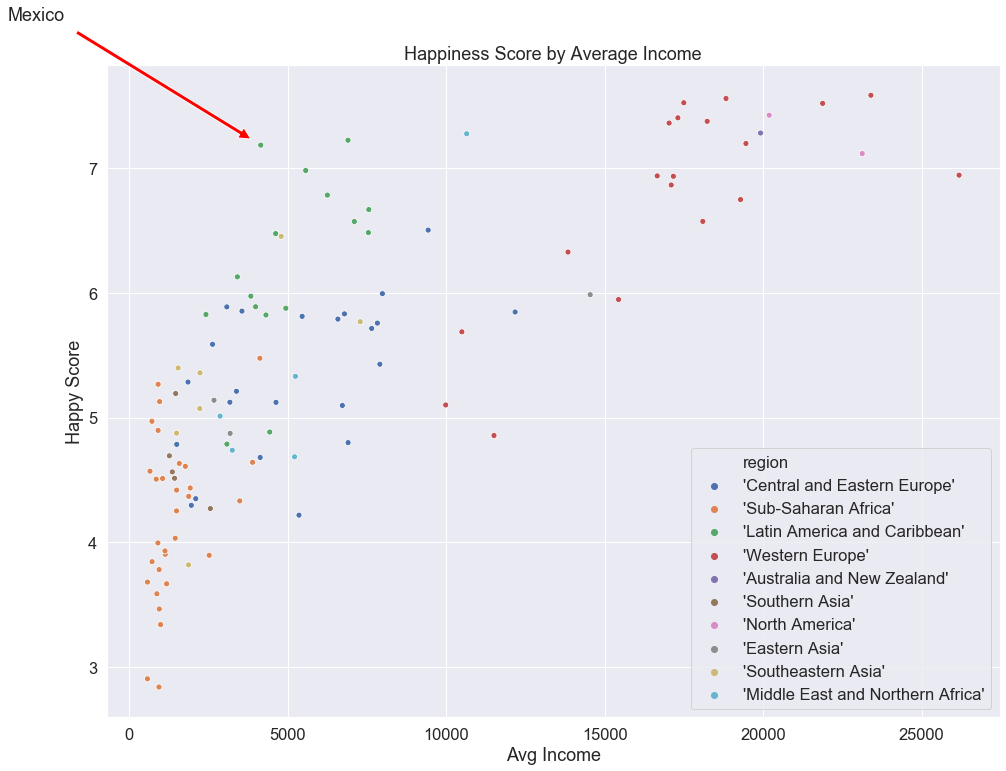

In [5]:
x = "avg_income"
y = "happyScore"
country = 'Mexico'

ax = sns.scatterplot(x=x, y=y, hue='region', data=df)
ax.set_xlabel(x.replace('_', ' ').title())
ax.set_ylabel(re.sub('([A-Z]{1})', r' \1', y).title())
ax.set_title('Happiness Score by Average Income')

xys = list(df[df.country == country][[x, y]].values[0])
# we can use ax.text or ax.annotate
ax.annotate(country, 
            xy=xys, 
            xytext=[xys[0]-8000, xys[1]+1],
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
plt.show();

In [6]:
import numpy as np
from sklearn.cluster import KMeans

In [7]:
income_happy = np.column_stack((df['avg_income'], df['happyScore']))
kmeans = KMeans(n_clusters=3).fit(income_happy)

In [8]:
kmeans.cluster_centers_

array([[1.87593022e+04, 7.03270000e+00],
       [7.57755711e+03, 5.85080769e+00],
       [2.19912121e+03, 4.75472308e+00]])

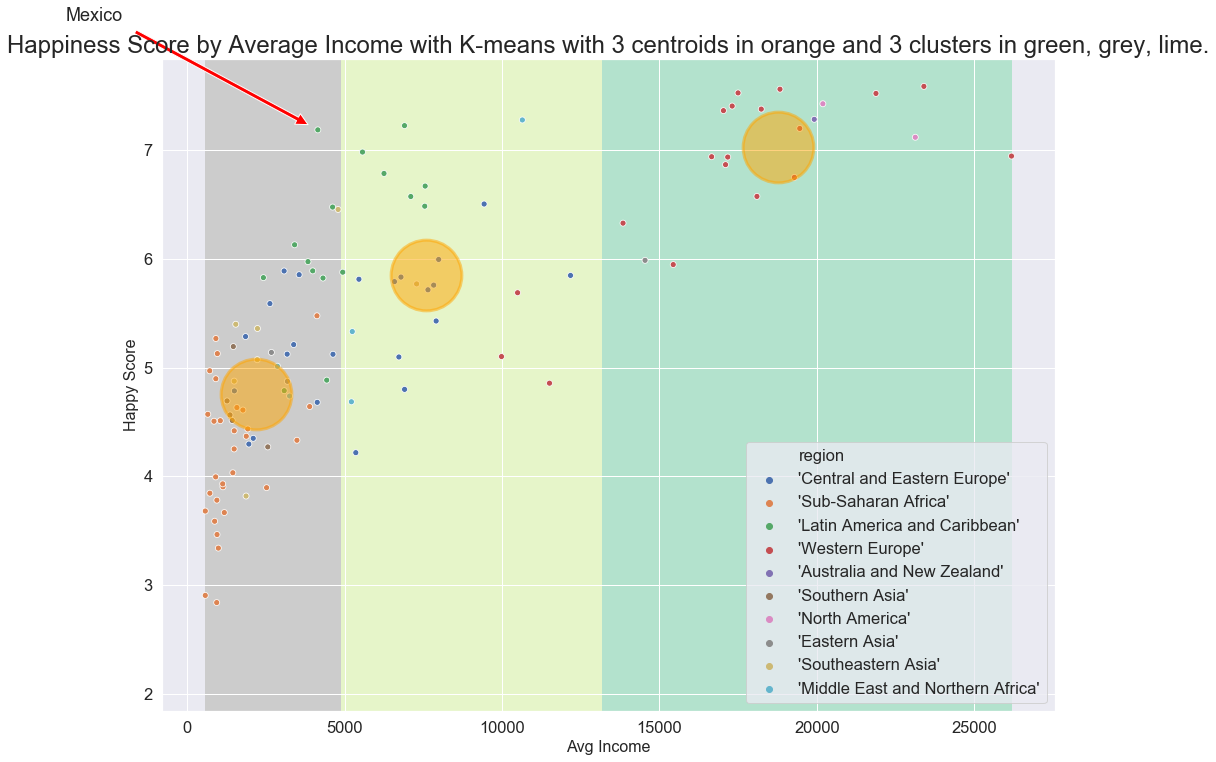

In [10]:
reduced_data = df[['avg_income', 'happyScore']].to_numpy()

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 1     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2,
           aspect='auto', origin='lower')

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], 
            centroids[:, 1],
#             marker='x', 
            s=5000, 
            linewidths=3,
            color='orange', 
            alpha=0.5,
            zorder=10,
           )

ax = sns.scatterplot(x=x, y=y, hue='region', data=df)
ax.set_xlabel(x.replace('_', ' ').title(), fontsize=16)
ax.set_ylabel(re.sub('([A-Z]{1})', r' \1', y).title(), fontsize=16)
ax.set_title('Happiness Score by Average Income with K-means with 3 centroids in orange and 3 clusters in green, grey, lime.', fontsize=24)

xys = list(df[df.country == country][[x, y]].values[0])
# we can use ax.text or ax.annotate
ax.annotate(country, 
            xy=xys, 
            xytext=[xys[0]-8000, xys[1]+1],
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
plt.show();